In [45]:
import os
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import dask
import matplotlib.pyplot as plt

from utils import loca_gard_mapping
from utils import roar_data_path as project_data_path

In [3]:
# We want to check these mappings are valid
# i.e. that LOCA r1i1p1f1 and GARD-LENS 1001_01
# are downscaled from the same coarse GCM outputs.
loca_gard_mapping

{'r1i1p1f1': '1001_01',
 'r2i1p1f1': '1021_02',
 'r3i1p1f1': '1041_03',
 'r4i1p1f1': '1061_04',
 'r5i1p1f1': '1081_05',
 'r6i1p1f1': '1101_06',
 'r7i1p1f1': '1121_07',
 'r8i1p1f1': '1141_08',
 'r9i1p1f1': '1161_09',
 'r10i1p1f1': '1181_10'}

In [34]:
# Define large enough area common to both domains
lat_domain = [25,45]
lon_domain = [-125, -70]

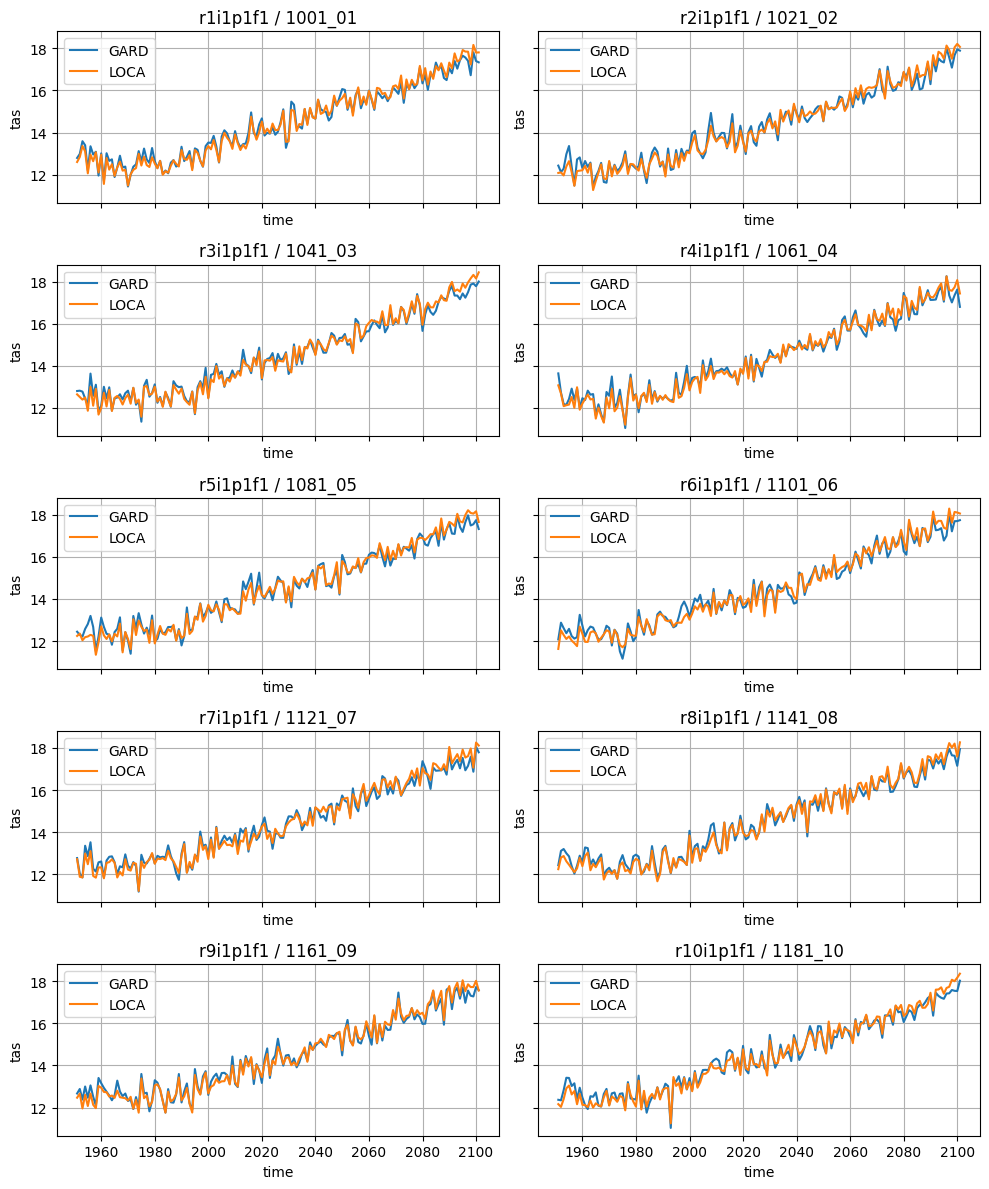

In [57]:
# Average temperature
metric_id = 'avg_tas'
var_id = 'tas'

fig, axs = plt.subplots(5, 2, figsize=(10,12), sharex=True, sharey=True)
axs = axs.flatten()

for idm, member in enumerate(loca_gard_mapping.keys()):
    ax = axs[idm]
    # Read
    ds_loca = xr.open_mfdataset(f'{project_data_path}/metrics/LOCA2/{metric_id}_CESM2-LENS_{member}_*.nc')
    ds_gard = xr.open_dataset(f'{project_data_path}/metrics/GARD-LENS/{metric_id}_cesm2_{loca_gard_mapping[member]}_ssp370.nc')

    # Plot GARD
    ds_gard[var_id].sel(lat=slice(lat_domain[0], lat_domain[1]), 
                       lon=slice(lon_domain[0], lon_domain[1])).mean(dim=['lat', 'lon']).plot(ax=ax, label='GARD')

    # Plot LOCA
    ds_loca[var_id].sel(lat=slice(lat_domain[0], lat_domain[1]), 
                       lon=slice(360+lon_domain[0], 360+lon_domain[1])).mean(dim=['lat', 'lon']).plot(ax=ax, label='LOCA')

    # Tidy
    ax.legend()
    ax.grid()
    ax.set_title(f'{member} / {loca_gard_mapping[member]}')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/metrics/GARD-LENS/sum_pr_cesm2_1001_01_ssp370.nc'

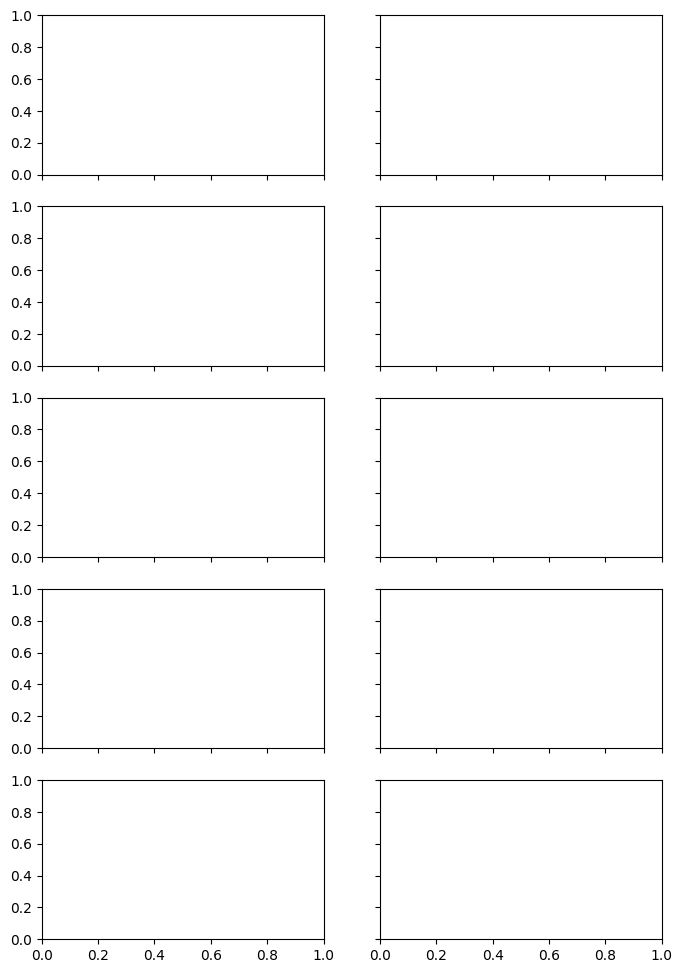

In [56]:
# Total precip
metric_id = 'sum_pr'
var_id = 'pr'

fig, axs = plt.subplots(5, 2, figsize=(8,12), sharex=True, sharey=True)
axs = axs.flatten()

for idm, member in enumerate(loca_gard_mapping.keys()):
    ax = axs[idm]
    # Read
    ds_loca = xr.open_mfdataset(f'{project_data_path}/metrics/LOCA2/{metric_id}_CESM2-LENS_{member}_*.nc')
    ds_gard = xr.open_dataset(f'{project_data_path}/metrics/GARD-LENS/{metric_id}_cesm2_{loca_gard_mapping[member]}_ssp370.nc')

    # Plot GARD
    ds_gard[var_id].sel(lat=slice(lat_domain[0], lat_domain[1]), 
                       lon=slice(lon_domain[0], lon_domain[1])).mean(dim=['lat', 'lon']).plot(ax=ax, label='GARD')

    # Plot LOCA
    ds_loca[var_id].sel(lat=slice(lat_domain[0], lat_domain[1]), 
                       lon=slice(360+lon_domain[0], 360+lon_domain[1])).mean(dim=['lat', 'lon']).plot(ax=ax, label='LOCA')

    # Tidy
    ax.legend()
    ax.grid()
    ax.set_title(f'{member} / {loca_gard_mapping[member]}')

plt.show()